In [1]:
'''
USING PIP INSTALL HERE FOR ANY UNINSTALLED PACKAGES
'''
!pip install yfinance
!pip install emoji

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 8.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 175 kB 4.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5f5c5a42ae49df3f9e634efd9461fc49e77a63f1d24b2df24624cfd2437704d7
  Stored 

In [2]:
'''
IMPORTING THE PACKAGES REQUIRED FOR 
EXPLORATORY DATA ANALYSIS:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress 
import seaborn
import tables
import yfinance as yf 
%matplotlib inline
import emoji

In [3]:
'''
PACKAGES FOR PREPROCESSING:
'''
import tweepy
import math
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import datetime
import requests
from sklearn.ensemble import RandomForestRegressor



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


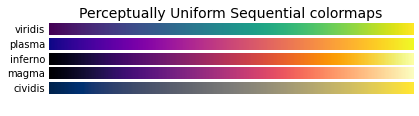

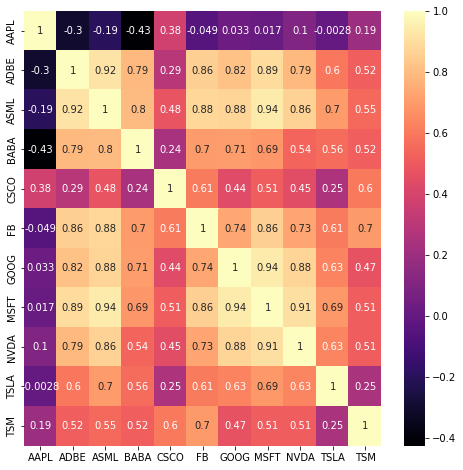

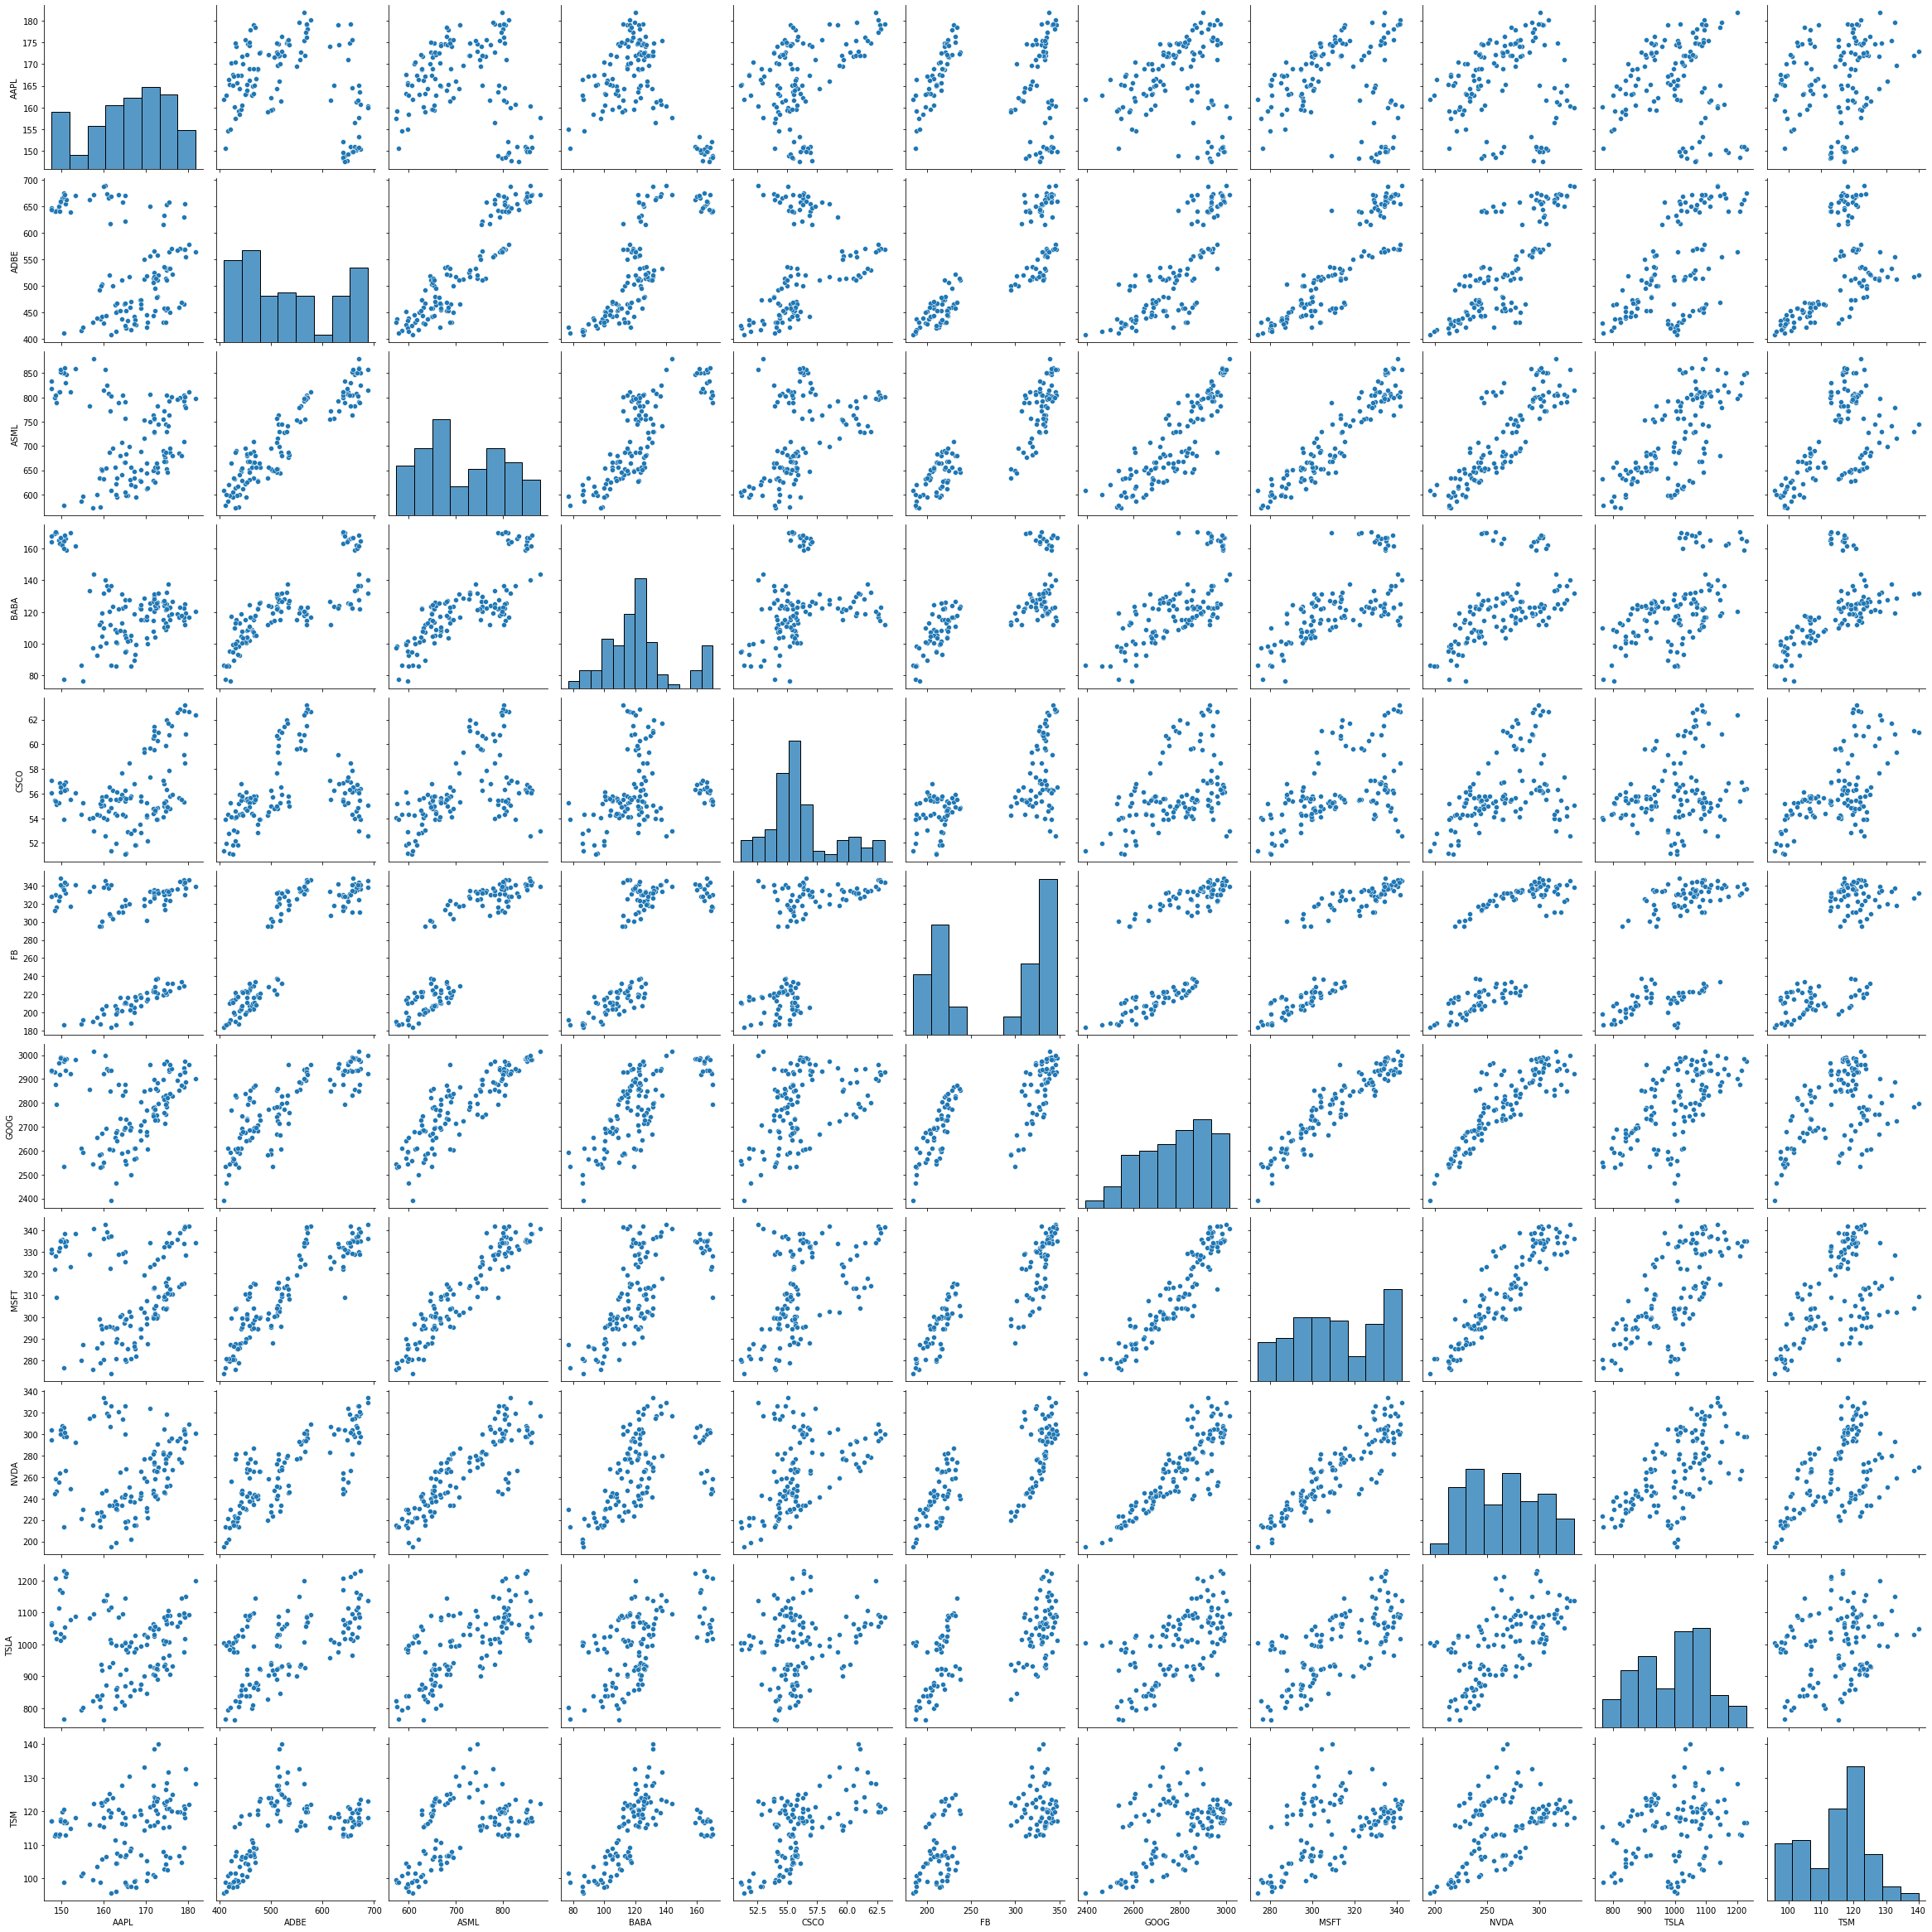

In [ ]:
'''
IN THIS CELL WE WILL BE LOOKING AT THE ADJ CLOSING PRICES OVER THE PAST 
6 MONTHS OF THE FOLLOWING TECHNOLOGY COMPANIES LISTED ON THE EXCHANGE WHICH
ARE SHOWN BELOW. 
WE WILL RUN A CORRELATION MATRIX TO SEE WHICH ARE NEGATIVELY/POSITIVELY/UNCORRELATED
STOCKS.
'''


#DOWNLOAD THE PRICES DATAFRAME
prices = yf.download("TSLA", start="2017-01-01", end="2022-04-14")

# Have a list of tech stock tickers
tickers = [ 'AAPL', 'TSLA', 'GOOG', 'MSFT', 'FB', 'NVDA', 'TSM', 'BABA', 'ASML', 'CSCO', 'ADBE']

# Get 6-month historic quotes for tickers
df = yf.download(tickers,period='6mo')['Adj Close']

#Create a visually pleasing colour code to differeniate the stocks and their correlation
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])



'''HEATMAP OF THE CORRELATION MATRIX OF THE COMPANIES MENTIONED ABOVE 
WITH A SCAL FROM 0-1 TO SHOW THE CORRELATION'''
plt.figure(figsize = (8,8))
seaborn.heatmap(df.corr(), annot=True, cmap="magma")
#Simple heatmap showingg the correlation between each stock price

'''COMPARING THE CORRELATION BY PLOTTING THE VALUES OF CORRELATION'''
#compare pairplot and heatmap positive and negative correlation
df_pairplot = df.dropna()
seaborn.pairplot(df_pairplot, height=3)

In [ ]:
'''NOW WERE GOING TO DO THE PREPROCESSING FOR THE O-H-L-C(OPEN,HIGH,LOW,AND CLOSE) PRICE'''
def OHLC_preprocessing(stock,start_date,end_date):
    

    '''
    WE WILL ATTEMPT THE FOLLOWING:
    1)PULL THE TICKER DATAFRAME USING YAHOO FINANCE 
    2)TRANSFORM THE TICKER DATAFRAME INTO A CSV FILE 
    3)READ THE CSV FILE AND PUT IT INTO A VARIABLE 'data' 
    '''
    #DOWNLOAD THE DATAFRAME
    df=yf.download(stock,start=start_date,end=end_date)
    data=pd.DataFrame(data=df,columns=['Date','Close'])
    df.to_csv('stock_ticker_df.csv')
    data=pd.read_csv('stock_ticker_df.csv')


    '''
    HERE WE IMPLIMENT THE FORMAT FOR THE DATE TO BE IN THE FORM OF
    YYYY-MM-DD(YYYY:YEAR/MM:MONTH/DD:DAY)
    AFTER WHICH SET THE DATE AS THE INDEX IT TO PLOT THE CLOSING PRICE HISTORY
    ACCORDING TO THE DATE
    '''
    #CHANGING THE DATE FORMAT AND INDEXING IT
    data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
    data.index=data['Date']
    plt.figure(figsize=(16,8))
    plt.plot(data["Close"],label='Close Price history')


    '''
    WE WILL PERFORM THE FOLLOWING:
    1)FIRST SORT THE DATAFRAME ACCORDING TO DATE
    2)CREATE A NEW DATAFRAME WITH CLOSING PRICE AND DATE COLUMNS
    3)LOOP IT AND ADD IT TO THE 'new_df'
    '''
    #SORT THE DATAFRAME ACCORDING TO DATETIME
    data_1=data.sort_index(ascending=True,axis=0)
    
    #CREATE A NEW DATAFRAME WITH DATE/CLOSE PRICE COLUMNS
    new_df=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

    #LOOP THE 
    for i in range(0,len(data_1)):
      new_df['Date'][i]=data_1['Date'][i]
      new_df['Close'][i]=data_1['Close'][i]
    

    '''
    THE LAST BIT OF OHLC PREPROCESSING CONSISTS OF THE FOLLWING:
    1)NORMALIZE THE DATASET USING 'MinMaxScaler'
    2)REMOVE ALL COLUMNS EXCEPT 'Close' PRICE COLUMN
    3)CREATE THE TRAINING DATA LENGTH
    4)CREATE THE TRAIN/TEST SPLIT
    5)FOR LSTM WE HAVE TO CONVERT THE TWO DIMENSIONAL TRAIN DATA INTO THREE DIMENSIONS 
    FOR THE LSTM MODEL
    '''
    #REMOVE COLUMNS EXCEPT 'Close'
    close_df=new_df.filter(['Close'])

    #RETURN DICTIONARY 
    final_df=close_df.values

    #MAKE SCALER FUNCTION
    scaler=MinMaxScaler(feature_range=(0,1))

    #APPLY SCALER ON THE DATAFRAME
    scaled_data=scaler.fit_transform(final_df)

    #CREATE TRAINING DATA LENGTH
    training_data_len=math.ceil(len(final_df)*0.8)
    train_data=scaled_data[0:training_data_len,:]
    x_train,y_train=[],[]

    '''
    RUN A FOR LOOP TO USE THE PAST SIXTY DAYS CLOSING PRICE TO APPEND INTO 'x_train'
    AND APPEND THE SIXTY-FIRST INTO THE Y_TRAIN
    '''
    #TAKE THE DATA FOR THE LAST SIXTY DAYS AND THE NEXT DAY IN 'x_train' & 'y_train' respectively 
    for i in range(60,len(train_data)):
      x_train.append(scaled_data[i-60:i,0])
      y_train.append(scaled_data[i,0])

    #TRANSFORM THE DATA INTO TWO ARRRAYS 
    x_train,y_train=np.array(x_train),np.array(y_train)

    #TRASNFORM THE TWO DIMENSIONAL DATA INTO THREE FOR THE MODEL REQUIREMENTS 
    x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

    return x_train


[*********************100%***********************]  1 of 1 completed


array([[[0.19223147],
        [0.18948977],
        [0.22132521],
        ...,
        [0.1453161 ],
        [0.15003807],
        [0.17578069]],

       [[0.18948977],
        [0.22132521],
        [0.19116533],
        ...,
        [0.15003807],
        [0.17578069],
        [0.21325211]],

       [[0.22132521],
        [0.19116533],
        [0.16420411],
        ...,
        [0.17578069],
        [0.21325211],
        [0.25346536]],

       ...,

       [[0.43381566],
        [0.45986299],
        [0.49352623],
        ...,
        [0.84752482],
        [0.85011428],
        [0.85041899]],

       [[0.45986299],
        [0.49352623],
        [0.50114238],
        ...,
        [0.85011428],
        [0.85041899],
        [0.89444032]],

       [[0.49352623],
        [0.50114238],
        [0.5044935 ],
        ...,
        [0.85041899],
        [0.89444032],
        [0.9012948 ]]])

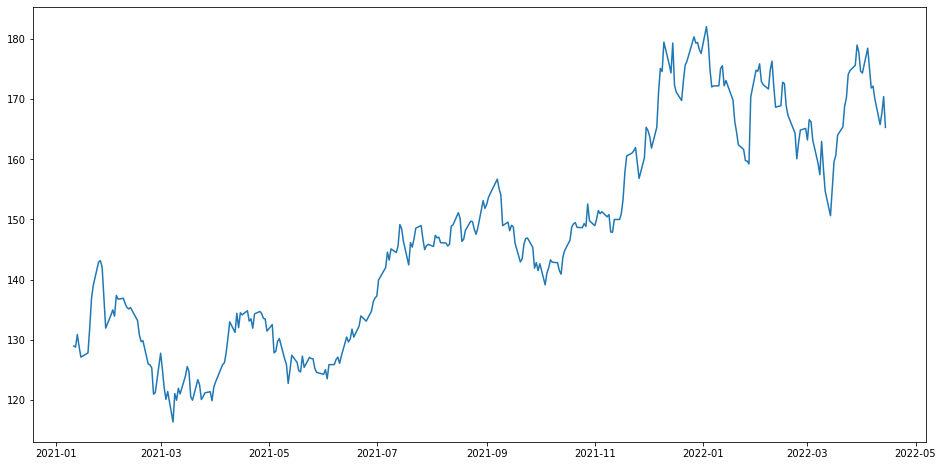

In [ ]:
#CALLING THE OHLC PREPROCESSING FUNCTION 
a=OHLC_preprocessing('AAPL','2021-01-10','2022-04-15')
a

In [ ]:
!pip install searchtweets


In [ ]:
!pip install emoji

In [28]:
class twitter_sentiment_analysis():

  '''  
  HERE I HAVE INTITALISED THE ATTRIBUTES WE NEED TO RUN A SEARCH ON TWEETS 
  AND THE TICKER. THE VARIABLES RETURNED FROM THE FUNCTIONS BELOW ARE INTIALISED AND
  USED IN OTHER FUNCTIONS.
  '''
  def __init__(self,name,stock_name,start,end,predict_days):
      #CREATING THE DATASTRUCTURES REQUIRED IN THE CLASS 
    self.name=name
    self.stock_name=stock_name
    self.start = start
    self.end = end
    self.predict_days = predict_days
    self.tweets=self.get_tweets()
    self.p_d=self.price_date()
    #self.tweets=pd.DataFrame(columns=['Date','Tweets'])
    self.tweets_df=self.club_tweets()
    #self.clean=self.clean_tweets()
    self.cleaner=self.clean_tweets()
    self.final=self.final_df()

  '''
  THE 'get_news()' FUNCTION USES A NEW'S API TO PULL NEWS HEADLINE INTO A JSON
  DIRECTORY. IN THE DIRECTORY WE STORE THE TITLE AND DATE FOR EACH HEADLINE. 
  AFTER THAT A SENTIMENT ANALYSIS IS RUN TO GET THE POSITIVE/NEUTRAL/NEGATIVE/COMPOUND
  SENTIMENT ON EACH HEADLINE AND PUT INTO A DATAFRAME ALONG WITH THE CLOSING PRICE HISTORY
  IN ANOTHER COLUMN.
  '''
  def get_tweets(self):
    
    consumer_key = 'AWkqjQztwqJ1UpHXlMCe5FpQa'
    consumer_secret = 'rGKorWs1Ou9zHygQ3YmU3GQQJUOHWSCXJ0IHYeVGO5pUmUED5R'
    access_key= '292442479-obLaGy67xpOYsXTN5Q6D8KUVYYFG7pocPED0f71E'
    access_secret = 'xjPYh2yK0lXi60WNGrQ9qxqdCiByiosLztCQNkZEU0amv'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    # Define the search term and the date_since date as variables
    search_words = "#wildfires"
    date_since = "2022-04-01"

    # Collect tweets
    tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since).items()

    tweet_df=pd.DataFrame(columns=['TEXT','DATE'])

    # Iterate and print tweets
    users_text = [[tweet.text, tweet.created_at] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                    columns=['Text', "Date"])
    
    tweet_text['Date_new']=tweet_text['Date'].dt.date
    tweet_text=tweet_text.drop(columns=['Date'])

    return tweet_text
  

  '''
  THE FUNCTION BELOW COLLECTS THE HISTORICAL TICKER DATA.
  AFTER WHICH WE CONVERT IT INTO A CSV FILE TO GET THE DATE COLUMN.
  WE THEN PUT THE CLOSING PRICE AND THE DATE COLUMN INTO A DATAFRAME.
  '''
  def price_date(self):

    ticker_df=yf.download(self.name,self.start,self.end)
    ticker_df.to_csv('ticker_df.csv')
    df_ticker = pd.read_csv("ticker_df.csv") 
    close_date=pd.DataFrame(data=df_ticker,columns=['Date','Close'])

    return close_date
  

  '''
  THE FUNCTION BELOW IS TO CLUB ALL THE TWEETS
  IN A SINGLE ROW WITH THE DATE AS THE INDEX 
  '''
  def club_tweets(self):
    cdata=self.tweets
    #cdata.sort_values(by='Date_New', inplace=True)
    tweets=pd.DataFrame(columns=['Date','Tweets'])
    indx=0
    get_tweet=""
    for i in range(0,len(cdata)-1):
        get_date=cdata.Date_new.iloc[i]
        next_date=cdata.Date_new.iloc[i+1]
        if(str(get_date)==str(next_date)):
            get_tweet=get_tweet+cdata.Text.iloc[i]+" "
        if(str(get_date)!=str(next_date)):
            temp_df = pd.DataFrame([[get_date, 
                                    get_tweet]], columns = ['Date','Tweets'])
            tweets = pd.concat([tweets, temp_df], axis = 0).reset_index(drop = True)
            get_tweet=" "  

    return tweets  


  '''
  THE FUNCTION BELOW IS TO CLEAN EACH ROW OF TWEETS WITH THE CONDITIONS GIVEN BELOW
  '''
  def clean_tweets(self):
    #data=self.tweets_df.to_csv("Tweets.csv")
    data=pd.DataFrame(data=self.tweets_df,columns=['Date','Tweets'])
    cdata=pd.DataFrame(columns=['Date','Tweets'])
    total=100
    index=0
    print(data)
    for index,row in data.iterrows():
        stre=row["Tweets"]
        my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
        my_new_string = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", stre) #Remove http links
        my_new_string = " ".join(stre.split())
        my_new_string = ''.join(c for c in stre if c not in emoji.UNICODE_EMOJI) #Remove Emojis
        my_new_string = stre.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
        temp_df = pd.DataFrame([[data["Date"].iloc[index],my_new_string]], columns = ['Date','Tweets'])
        cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    return cdata
  
  '''
  THE FUNCTION BELOW WILL CLUB THE DATE THE CLOSING PRICE AND THE TWEETS INTO ONE DATAFRAME.
  HERE FOUR MORE COLUMNS WILL BE ADDED FOR SENTIMENT ANALYSIS.
  '''
  def final_df(self):
    tweets=self.cleaner
    price=self.p_d
    indx=0
    tweets['Prices']=''
    for i in range (0,len(tweets)):
        for j in range (0,len(price)):
            get_tweet_date=tweets.Date.iloc[i]
            get_stock_date=price.Date.iloc[j]
            if(str(get_stock_date)==str(get_tweet_date)):
                tweets['Prices'].iloc[i] = int(price.Close[j])


    '''HERE WERE CONVERTING THE FLOAT VALUES TO INTEGER TO RUN THROUGH 
    THE SENTIMENT ANALYSER FUNCTION'''
    mean=0
    summ=0
    count=0
    for i in range(0,len(tweets)):
        if(tweets.Prices.iloc[i]!=""):
            summ=summ+int(tweets.Prices.iloc[i])
            count=count+1
    mean=summ/count
    for i in range(0,len(tweets)):
        if(tweets.Prices.iloc[i]==""):
            tweets.Prices.iloc[i]=int(mean)


    
    '''HERE WERE CREATING THE FINAL DATAFRAME WITH TWEETS PRICES AND SENTIMENTS '''
    tweets['Prices'] = tweets['Prices'].apply(np.int64)
    tweets["Comp"] = ''
    tweets["Negative"] = ''
    tweets["Neutral"] = ''
    tweets["Positive"] = ''

    sentiment_i_a = SentimentIntensityAnalyzer()
    for indexx, row in tweets.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', tweets.loc[indexx, 'Tweets'])
            sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
            tweets['Comp'].iloc[indexx] = sentence_sentiment['compound']
            tweets['Negative'].iloc[indexx] = sentence_sentiment['neg']
            tweets['Neutral'].iloc[indexx] = sentence_sentiment['neu']
            tweets['Positive'].iloc[indexx] = sentence_sentiment['pos']

        except TypeError:
            print (price.loc[indexx, 'Tweets'])
            print (indexx)

    return tweets

  def train_test_split(self):

    data=self.final_df()
    
    X = data[['Comp','Negative','Neutral','Positive']]
    y = data[['Prices']]
    
    #Predict days is the amount of latest days you would want to predict for
    X_train = X[:len(X)-self.predict_days]
    y_train = y[:len(X)-self.predict_days]
    X_test = X[len(X)-self.predict_days:]
    y_test = y[len(X)-self.predict_days:]

    
    
    #Fitting the random forest regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, np.ravel(y_train))

    #making prediction
    prediction = rf.predict(X_test) 
    #print(prediction,'\n', y_test)

    y_test = y_test.rename(columns={"Prices": "actual_price"}).reset_index()
    prediction = pd.DataFrame({'predicted_price': prediction})
    # print(prediction, '\n', y_test)
    # return y_test

    #Plotting the prediction
    ax = prediction.plot(title='Random Forest predicted prices')#predicted value
    ax.set_xlabel("Indexes")
    ax.set_ylabel("Stock Prices")
    fig = y_test.plot(ax = ax).get_figure()#actual value
    fig.savefig("random forest.png")




In [29]:
tesla=twitter_sentiment_analysis('TSLA','TSLA','2022-04-25','2022-05-05',3)

[*********************100%***********************]  1 of 1 completed
         Date                                             Tweets
0  2022-05-07  RT @PopnMatters: A new report from Global Fore...
1  2022-05-06   RT @NMBewitched: #Wildfires\n#NMDog\nHere is ...
2  2022-05-05   @ClimateHuman @BannanBannan1 This is July of ...
3  2022-05-04   RT @NASAArmstrong: In honor of #International...
4  2022-05-03   RT @AbqFoundation: All Together NM Fund is co...
5  2022-05-02   RT @LoveWorld_Peopl: #BREAKING #RUSSIA\n\n🔴RU...
6  2022-05-01   ‘Turning the dial up’: US south-west braces f...
7  2022-04-30   RT @DavidZaber: Normal view and today's view....


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
tesla.final_df()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-05-07,RT @PopnMatters: A new report from Global Fore...,921,-0.9992,0.085,0.853,0.061
1,2022-05-06,RT @NMBewitched: Wildfires\nNMDog\nHere is th...,921,-0.9995,0.069,0.878,0.053
2,2022-05-05,@ClimateHuman @BannanBannan1 This is July of ...,921,-0.9995,0.119,0.789,0.092
3,2022-05-04,RT @NASAArmstrong: In honor of InternationalF...,952,-0.9968,0.087,0.839,0.074
4,2022-05-03,RT @AbqFoundation: All Together NM Fund is co...,909,0.9908,0.068,0.858,0.073
5,2022-05-02,RT @LoveWorld Peopl: BREAKING RUSSIA\n\n🔴RUSS...,902,-0.9968,0.082,0.847,0.071
6,2022-05-01,‘Turning the dial up’: US south-west braces f...,921,-0.9794,0.08,0.852,0.068
7,2022-04-30,RT @DavidZaber: Normal view and today's view....,921,-0.9999,0.113,0.85,0.037


In [31]:
tesla.train_test_split()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyError: ignored

In [ ]:
'''
THIS CELL IS FOR THE SENTIMENT ANALYSIS OF THE NEWS HEADLINES.
WE WILL RUN A SENTIMENT ANALYSIS ON ANY NEWS HEADLINE FOR THE STOCK SYMBOL
BETWEEN THE TIME PERIOD THE USER WISHES TO ANALYSE THE GIVEN STOCK.
'''
class news_sentiment_analysis:

  '''
  HERE I HAVE INTITALISED THE ATTRIBUTES WE NEED TO RUN A SEARCH ON TWEETS 
  AND THE TICKER. THE VARIABLES RETURNED FROM THE FUNCTIONS BELOW ARE INTIALISED AND
  USED IN OTHER FUNCTIONS.
  '''
  def __init__(self,name,stock_name,start,end,predict_days):
      #CREATING THE DATASTRUCTURES REQUIRED IN THE CLASS 
    self.name=name
    self.stock_name=stock_name
    self.start = start
    self.end = end
    self.predict_days = predict_days
    self.stocks = self.get_stocks()
    self.news = self.get_news()



  '''
  THE 'get_news()' FUNCTION USES A NEW'S API TO PULL NEWS HEADLINE INTO A JSON
  DIRECTORY. IN THE DIRECTORY WE STORE THE TITLE AND DATE FOR EACH HEADLINE. 
  AFTER THAT A SENTIMENT ANALYSIS IS RUN TO GET THE POSITIVE/NEUTRAL/NEGATIVE/COMPOUND
  SENTIMENT ON EACH HEADLINE AND PUT INTO A DATAFRAME ALONG WITH THE CLOSING PRICE HISTORY
  IN ANOTHER COLUMN.
  '''
  def get_news(self):
    API_KEY = 'OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX'
  
    Date = []
    title = []

    start = datetime.datetime.strptime(self.start, "%Y-%m-%d")
    end = datetime.datetime.strptime(self.end, "%Y-%m-%d")

    days = (end-start).days + 1
    

    for i in range(0,days):
      start_date = self.start.split('-')
      date = datetime.datetime(int(start_date[0]), int(start_date[1]), int(start_date[2])) + datetime.timedelta(i)
      end_date = date.strftime('%Y-%m-%d')

      url = f'https://eodhistoricaldata.com/api/news?api_token={API_KEY}&s={self.stock_name}&offset=0&limit=10&from={end_date}&to={end_date}'
      response = requests.get(url)
      json  = response.json()

      Date.append(end_date)
      temp = ''
      for j in json:
        temp = temp + j['title']
      title.append(temp)

    temp_df = pd.DataFrame({'title' : title, 'Date': Date})

    stocks = self.stocks[['Date','Adj Close']]
    df = temp_df.merge(stocks, on='Date', how='inner')
    df['Date'] = pd.to_datetime(df['Date'])

    df["Comp"] = ''
    df["Negative"] = ''
    df["Neutral"] = ''
    df["Positive"] = ''

    import unicodedata
    sentiment_i_a = SentimentIntensityAnalyzer()
    for indexx, row in df.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'title'])
            sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
            df['Comp'].iloc[indexx] = sentence_sentiment['compound']
            df['Negative'].iloc[indexx] = sentence_sentiment['neg']
            df['Neutral'].iloc[indexx] = sentence_sentiment['neu']
            df['Positive'].iloc[indexx] = sentence_sentiment['compound']
        except TypeError:
            print (self.stocks.loc[indexx, 'title'])
            print (indexx)

    return df



  '''
  IN THIS FUNCTION WE PLOT A PIE CHART FOR THE PERCENTAGE OF POSTIVE TO NEGATIVE 
  NEWS HEADLINE SENTIMENT.
  '''
  def plot_news(self):
    temp_df = self.news
    posi=0
    nega=0
    for i in range (0,len(temp_df)):
        get_val=temp_df.Comp[i]
        if(float(get_val)<(0)):
            nega=nega+1
        if(float(get_val>(0))):
            posi=posi+1
    posper=(posi/(len(temp_df)))*100
    negper=(nega/(len(temp_df)))*100
    print("% of positive news= ",posper)
    print("% of negative news= ",negper)
    arr=np.asarray([posper,negper], dtype=int)
    plt.pie(arr,labels=['positive','negative'])
    plt.plot()

    return plt.plot()
    



  '''
  THIS FUNCTION USES THE YAHOO FINANCE PACKAGE TO PULL THE STOCK PRICE HISTORICAL DATA 
  FOR ANY STOCK SYMBOL OVER A VARIETY OF TIME FRAME AND PERIODS.
  '''
  def get_stocks(self):

      ticker_df = yf.download(tickers = self.stock_name,start=self.start,end=self.end).reset_index()
    
      df = ticker_df[['Open',	'High',	'Low',	'Close',	'Adj Close',	'Volume']]
      temp_date = []

      for i in range(0,len(ticker_df)):
        temp_date.append(str(ticker_df.Date.iloc[i]).split(' ')[0])

      temp_date = pd.DataFrame({'Date': temp_date})

      df = df.join(temp_date, how='inner')

      return df





  '''
  THE FOLLWING FUNCTION USES THE 'self.news' DATAFRAME. IT SELECTS THE 
  COMP, NEGATIVE, NEUTRAL, POSITIVE, AND ADJ CLOSE COLUMN TO CREATE THE 
  TRAIN/TEST SPLIT.
  '''
  def train_test(self):
    X = self.news[['Comp','Negative','Neutral','Positive']]
    y = self.news[['Adj Close']]
    
    #Predict days is the amount of latest days you would want to predict for
    X_train = X[:len(X)-self.predict_days]
    y_train = y[:len(X)-self.predict_days]
    X_test = X[len(X)-self.predict_days:]
    y_test = y[len(X)-self.predict_days:]

    
    
    #Fitting the random forest regressor
    rf = RandomForestRegressor()
    rf.fit(X_train, np.ravel(y_train))

    #making prediction
    prediction = rf.predict(X_test) 
    #print(prediction,'\n', y_test)

    y_test = y_test.rename(columns={"Adj Close": "actual_price"}).reset_index()
    prediction = pd.DataFrame({'predicted_price': prediction})
    # print(prediction, '\n', y_test)
    # return y_test

    #Plotting the prediction
    ax = prediction.plot(title='Random Forest predicted prices')#predicted value
    ax.set_xlabel("Indexes")
    ax.set_ylabel("Stock Prices")
    fig = y_test.plot(ax = ax).get_figure()#actual value
    fig.savefig("random forest.png")



In [ ]:
tesla = news_sentiment_analysis('tesla','TSLA','2021-01-01','2021-03-15',10)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


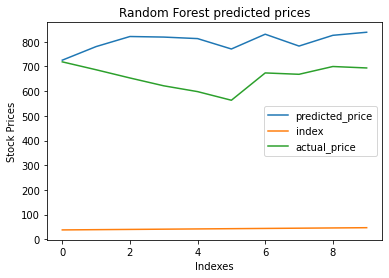

In [ ]:
tesla.train_test()

In [ ]:
tesla.news

,title,Date,Adj Close,Comp,Negative,Neutral,Positive
0,INTERVIEW: Momentus President Kennedy Confirms...,2021-01-04,729.770020,0.0,0.0,1.0,0.0
1,Two former Apple insiders are building a laser...,2021-01-05,735.109985,0.0,0.0,1.0,0.0
2,Dow Jones Pares Earlier Gains As Trump Rioters...,2021-01-06,755.979980,0.875,0.0,0.838,0.875
3,"Benzinga's Top Upgrades, Downgrades For Januar...",2021-01-07,816.039978,0.2023,0.0,0.795,0.2023
4,Portfolio Manager Thinks Gene-Editing Stocks C...,2021-01-08,880.020020,-0.4019,0.041,0.943,-0.4019
5,Clean energy outlook under a Biden Presidency'...,2021-01-11,811.190002,0.8611,0.0,0.817,0.8611
6,Oil Prices Jump To 10-Month High On Weak Dolla...,2021-01-12,849.440002,0.8074,0.069,0.665,0.8074
7,Tesla Leads 10 Top-Selling EVs In China But Ne...,2021-01-13,854.409973,0.0,0.0,1.0,0.0
8,"Tesla stock is 'very fully priced,' says inves...",2021-01-14,845.000000,0.3818,0.0,0.956,0.3818
9,"Going on a Tear Once Again, Tread Carefully Wi...",2021-01-15,826.159973,0.7579,0.058,0.707,0.7579
